In [1]:
from math import ceil

import pandas as pd
import matplotlib.pyplot as plt

import os.path as osp

In [ ]:
data = pd.read_csv(osp.join('..', 'Data', 'Groceries 1.csv'))
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


# Preprocess - Duplicated Values

In [3]:
duplicates = data[data.duplicated()]
duplicates

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [4]:
duplicates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 759 entries, 5015 to 38723
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    759 non-null    int64 
 1   Date             759 non-null    object
 2   itemDescription  759 non-null    object
dtypes: int64(1), object(2)
memory usage: 23.7+ KB


In [5]:
duplicates.groupby('itemDescription').count()['Member_number'].sort_values(ascending=False)

itemDescription
whole milk                   139
other vegetables              71
rolls/buns                    70
soda                          61
yogurt                        49
                            ... 
packaged fruit/vegetables      1
specialty chocolate            1
specialty bar                  1
sweet spreads                  1
white wine                     1
Name: Member_number, Length: 64, dtype: int64

In [6]:
data = data.drop_duplicates()

# General Information

In [7]:
def horizontal_bar(data: pd.DataFrame, ax, *, xticks = None):
    categories_pos = list(range(len(data), 0, -1))

    ax.barh(categories_pos, data.values, zorder=2)

    if xticks:
        ax.set_xticks(xticks)
    ax.set_yticks(categories_pos, data.index)

    ax.set_xlabel('Count')
    ax.set_ylabel(data.index.name)

    ax.grid(which='both', axis='x', zorder=0)

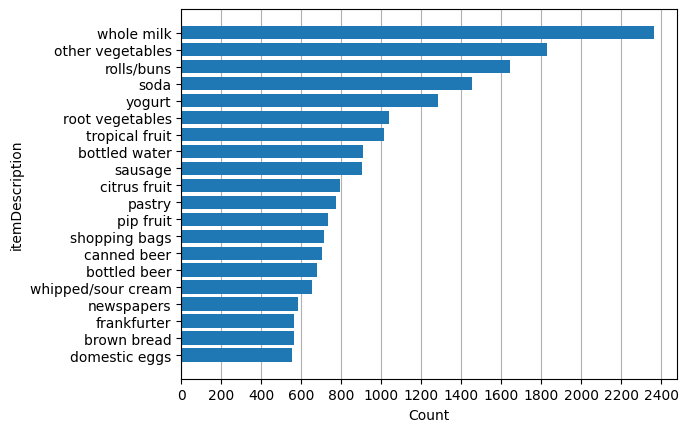

In [8]:
items_count = data.groupby('itemDescription')\
                  .count()['Member_number']\
                  .sort_values(ascending=False)
                  
top = 20
horizontal_bar(items_count.iloc[:top], plt.gca(), xticks=range(0, 2501, 200))

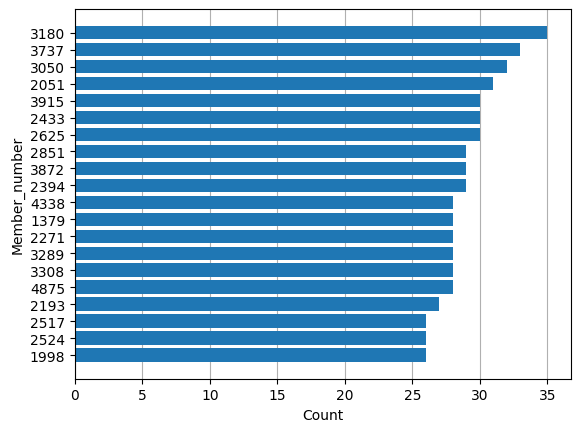

In [9]:
members_count = data.groupby('Member_number')\
                    .count()['Date']\
                    .sort_values(ascending=False)

top = 20
horizontal_bar(members_count.iloc[:top], plt.gca())

In [38]:
# dates_count = data.groupby('Date')\
#                     .count()['Member_number']\
#                     .sort_values(ascending=False)

temp_data = data.copy(deep=True)

temp_data['Date'] = temp_data['Date'].apply(lambda s: s.split('-'))

dates = temp_data['Date'].apply(lambda s: s[0])
months = temp_data['Date'].apply(lambda s: s[1]).rename('Month')
years = temp_data['Date'].apply(lambda s: s[2]).rename('Year')

temp_data.drop('Date', axis=1, inplace=True)
temp_data = pd.concat([temp_data, dates, months, years], axis=1)
temp_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38006 entries, 0 to 38764
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38006 non-null  int64 
 1   itemDescription  38006 non-null  object
 2   Date             38006 non-null  object
 3   Month            38006 non-null  object
 4   Year             38006 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


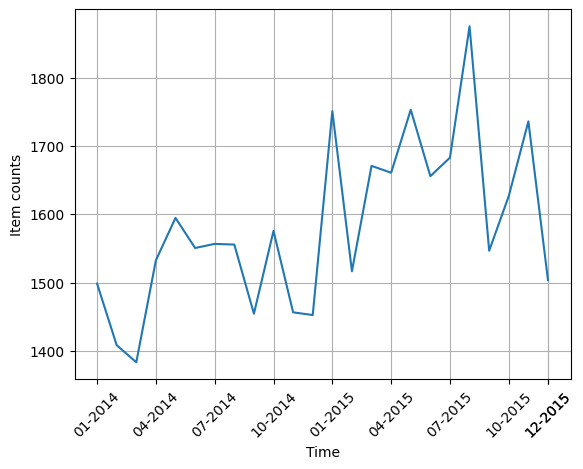

In [36]:
gp_month = temp_data.groupby(['Year', 'Month'])\
                    .count()['Member_number']\
                    .reset_index()

ticks = gp_month['Month'].astype('str') + '-' + gp_month['Year'].astype('str')
ticks_locs = list(range(0, len(gp_month), 3)) + [len(gp_month) - 1] + [len(gp_month) - 1]

ax = plt.gca()
ax.plot(range(len(gp_month)), gp_month['Member_number'].values)
ax.set_xticks(ticks_locs, ticks.loc[ticks_locs], rotation=45)
ax.set_xlabel('Time')
ax.set_ylabel('Item counts')
ax.grid()
plt.show()

In [41]:
temp_data[(temp_data['Month'].astype(int) >= 1) &
          (temp_data['Month'].astype(int) <= 4)]

,Member_number,itemDescription,Date,Month,Year
1,2552,whole milk,05,01,2015
4,3037,whole milk,01,02,2015
5,4941,rolls/buns,14,02,2015
8,2762,whole milk,20,03,2015
9,4119,tropical fruit,12,02,2015
...,...,...,...,...,...
38750,3761,sugar,12,02,2014
38751,4444,pastry,25,04,2014
38754,4796,Instant food products,02,03,2014
38761,2022,candy,23,02,2014


In [ ]:
temp_data.to_csv(osp.join('..', 'Data', 'processed.csv'))